- **Sequence transduction models**는 **인코더와 디코더를 포함하는 복잡한 recurrent 또는convolutional neural networks에 기초**합니다.
- 이러한 Sequence modeling에는 대부분 Recurrent neural network, LSTM, GRU가 주축으로 사용되었는데 몇 몇 문제들이 발생하였다.
- 위와 같은 Recurrent model들은 모든 데이터를 한꺼번에 처리하는 것이 아니라 sequence position t에 따라 순차적으로 입력에 넣어주어야 한다.
- 예를 들어 i am ironman을 Recurrent model에 넣을 때, 먼저 i를 network에 넣고 산출되는 hidden state 를 다음 position인 am에 대한 hidden state를 계산할 때 사용한다.
- 이러한 한계는 긴 sequence 길이를 가지는 데이터를 처리해야 할 때, memory와 computation에서 많은 부담이 생기게 된다.

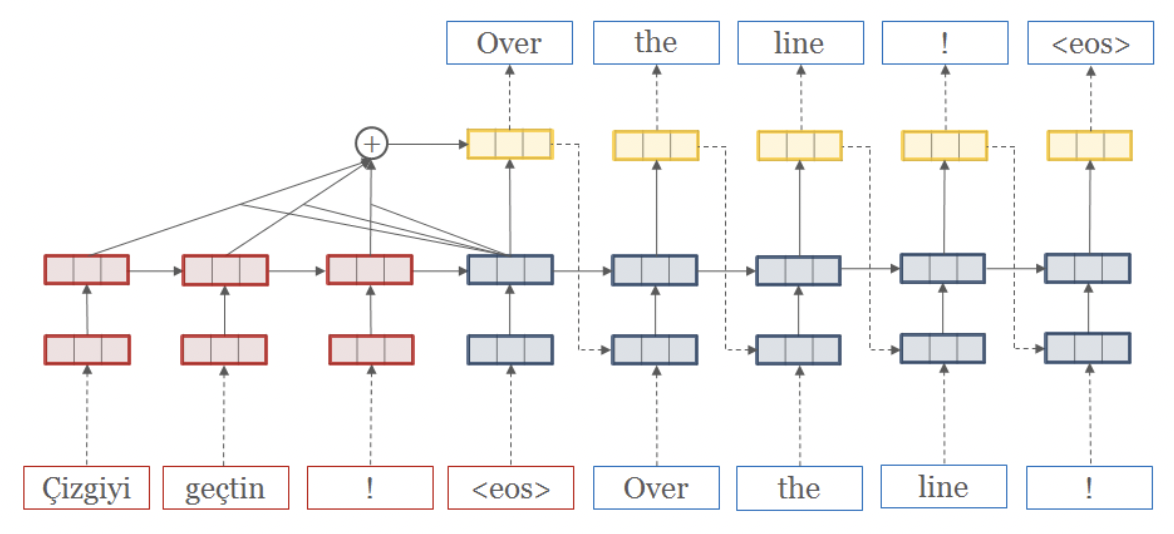

> 본 논문에서는 **오로지 attention mechanism에만 기초한 새롭고 간단한 network 구조를 제안**합니다.

- attention이라는 mechanism은 이 논문에서 처음 나온 것이 아니다. 이미 Sequence modeling에서 널리 사용되고 좋은 성능을 보이는 기법이었다. attention은 input 또는 output 데이터에서 sequence distance에 무관하게 서로 간의 dependencies를 모델링 한다. 예를 들어, 위 이미지는 franch를 english로 번역하는 sequence modeling에서 attention을 사용할 때 그 correlation matrix를 나타낸다.


- 논문에서 제안한 "Transformer"는 이러한 Attention mechanism을 전적으로 사용하여, 아예 모든 Network Architecture를 Attention"만"을 이용해 구축하고 이의 효율성과 엄청난 성능을 실험을 통해 보여준다

- Machine translation 작업에 대한 실험 결과에 따르면, 이 모델은 병렬 처리가 가능하고 학습시간이 훨씬 덜 소요됩니다. WMT Englishto-German 번역 대회에서 28.4 BLEU를 달성하면서 기존 최고 모델보다 2 BLEU 이상 향상하며 SOTA를 달성했습니다. 또한 다른 task에서도 잘 일반화됨을 보여줍니다.

> **도입 배경**

- RNN, LSTM, GRU는 language modeling, machine translation 등과 같은 시퀀스 모델링 문제에서 확고히 자리를 잡았습니다.
- 하지만 Recurrent 모델은 필연적으로 이전 결과를 입력으로 받는 순차적인 특성 때문에 병렬 처리를 배제합니다.
- 최근의 연구는 factorization tricks와 conditional computation을 통해 연산 효율의 대폭적인 향상을 달성했지만 아직까지 순차적 계산의 근본적인 제약은 여전히 남아있다고 합니다.

- 본 논문은 recurrent 모델의 제약 사항들은 피하고 입력과 출력 사이의 dependency를 이끌어내기 위해 transformer를 제안합니다.

> equence-to-sequence 모델은 이 encoder의 최종 output을 일종의 embedded vector로써 사용하여 Decoder에 넣어주게 되는데, memory와 computation 때문에 embedded vector의 maximum length를 제한해야한다. 긴 sequence 데이터를 처리해야할 때, 제한된 크기의 vector로 모든 정보를 담아내야하기 때문에 정보의 손실이 커지고 이에 따라 성능의 병목현상이 일어난다. 이러한 문제를 완화하기 위해서 encoder의 모든 state를 decoder에 참조시키거나 attention을 적용하는 등의 여러시도가 있었는데, 그 중에 가장 efficeint하고 강력한 방법이 바로 이 transformer라고 생각하면 된다.

> **Model 구조**


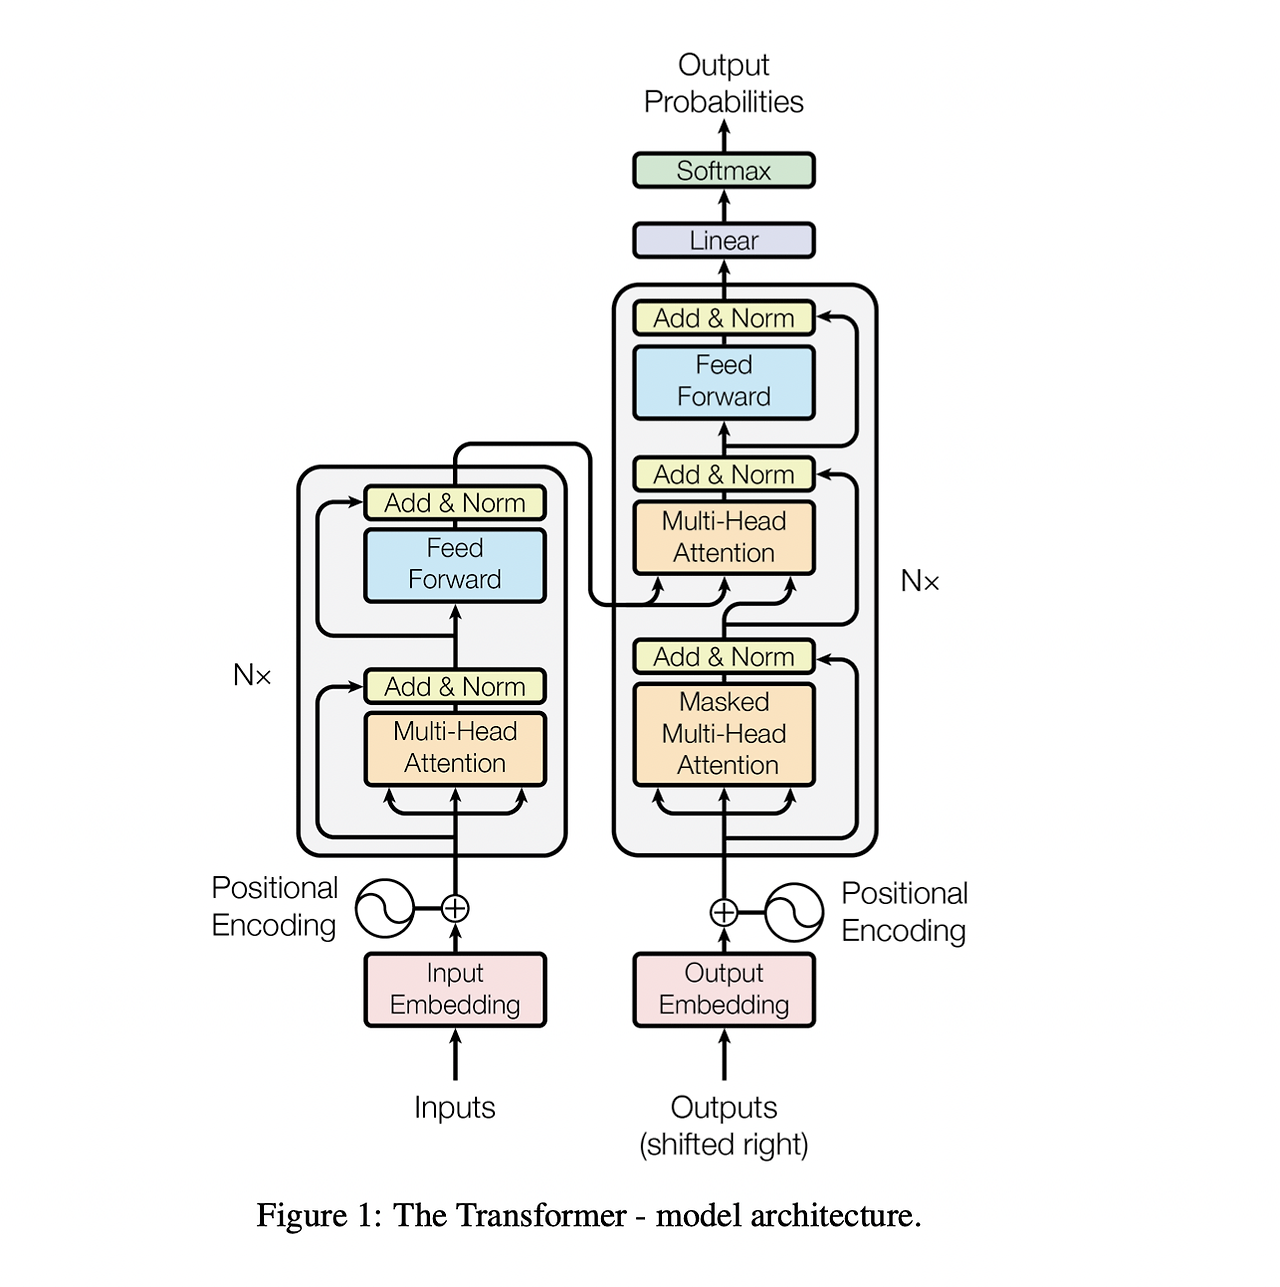

- Transformer 또한 encoder - decoder 구조를 가직 있다. 다만, 그 내부는 self - attention과 fully connected layer만으로 구성되어 있다.

> ## **Attention**

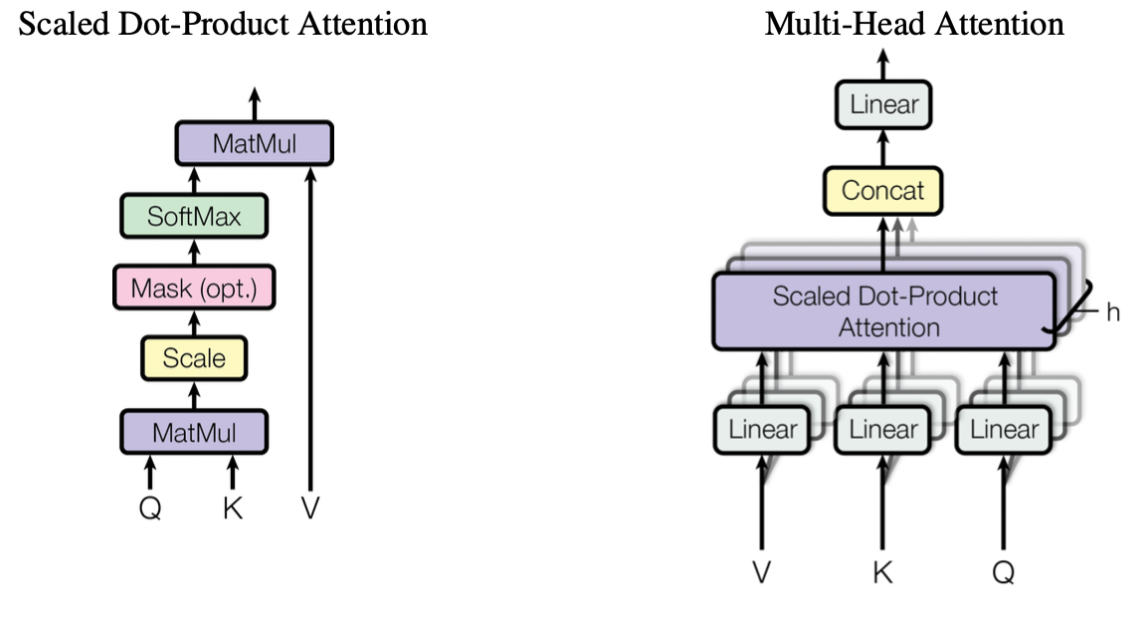

> Scaled Dot-Product Attention

먼저 input으로 Query(Q), Key(K), Value(V) 총 3개가 들어온다. 여기서 Query는 물어보는 주체, Key는 반대로 Query에 의해 물어봄을 당하는 주체, Values는 데이터의 값들을 의미한다. 이렇게만 들으면 이해가 어려울 수 있으니 먼저 계산식을 살펴본 후에 예를 들어 설명하겠다.

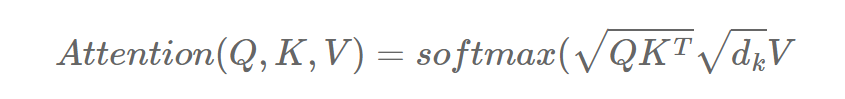

-  Query q는 어떤 단어를 나타내는 vector이고, K는 문장의 모든 단어들에 대한 vector들을 stack해놓은 matrix이다.

attention functions으로는 additive attention과 dot-product attention 두가지가 흔히 쓰인다. 두 방법은 이론적인 complexity는 비슷하지만, dot-product 방식이 더 빠르고 공간효율적이라서 이를 채택했다고 한다. 여기서 기존 방식과 다르게 1 / sqrt(dk)로 scaling을 해주는데, 이를 해주지 않으면 additive attention보다 성능이 대폭 떨어진다고 한다. 논문에서는 이를 softmax가 0 근처에서는 gradient가 높고, large positive and large negative value들에 대해서는 매우 낮은 gradient를 가지기 때문에 학습이 잘 되지 않는 문제가 일어나고, scaling을 통해 모든 값들이 0 근처에 오도록 만들어줌으로써 이러한 문제를 해결한다 말한다.

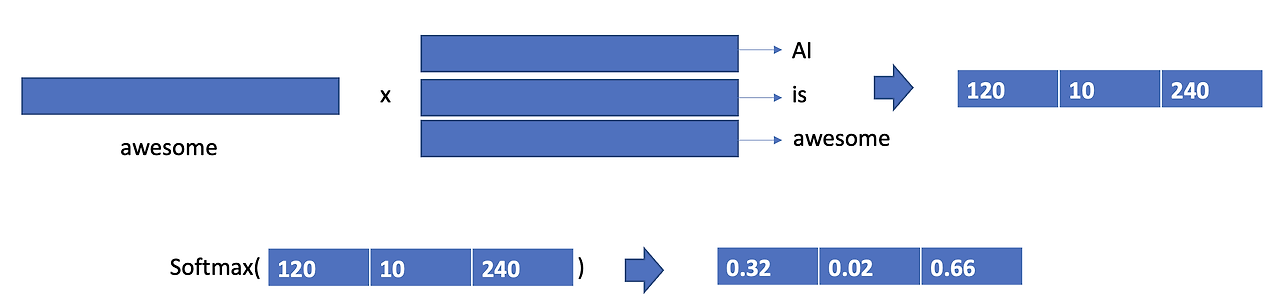

마지막으로 softmax를 통해서 Query 단어가 모든 단어들과 어느정도의 correlation이 있는지를 확률 분포 형태로 만들고, 이를 value matrix와 dot product를 해줌으로써 기존 vector에 Query와 Key간의 correlation 정보를 더한 vector를 만든다.

> ### Position-wise Feed-Forward Networks

attention layer과 함께 fully connected feed-forward network가 사용된다.

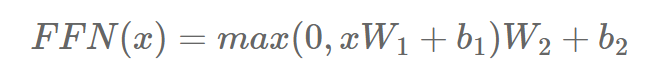

> ### Embeddings and Softmax

다른 sequence transduction 모델과 마찬가지로, input과 ouput token을 embedding layer를 거쳐서 사용한다. 이렇게 생성된 embedded vector는 semantic한 특성을 잘 나타내게 된다. 또한, 논문에서는 input embedding 과 output embedding에서 weight matrix를 서로 share하여 사용한다고 한다. embedding이라는 것 자체가 어떠한 단어(token)을 잘 표현할 수 있는 vector를 만드는 것이 목표이므로, input과 output이 어떠한 correlation을 가지고 있기 때문에 weight를 sharing하는 것이 어찌보면 직관적이라고 생각한다.

> ### **Positional Encoding**

이 논문에서 핵심이라고도 할 수 있는 기법이다. Transformer는 Recurrent model을 전혀 사용하지 않고 오직 Attention mechanism만을 사용하여 만들기 때문에 Sequence 정보를 담아낼 수가 없다. 따라서 별도로 이러한 sequence 정보를 데이터에 추가해주어야 하는데 이 역할을 하는 것이 바로 "positional encoding"이다.



이러한 positional encoding으로 선택할 수 있는 방식은 다양한데, 논문에서는 sine과 cosine 함수를 사용한다.

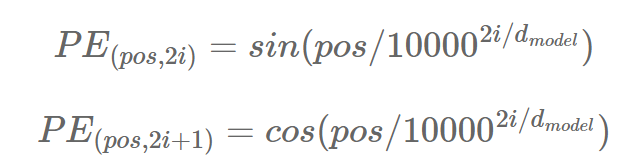

여기서 pos는 position, i는 dimension이다. 논문에서 이 함수를 사용한 이유는 어떠한 고정된 offset k에 대해서 PEpos+k를 PEpos의 linear function으로 나타낼 수 있기 때문에 모델이 쉽게 상대적인 위치를 참조할 수 있을 것이라 가정했기 때문이라고 한다. 또한 이를 학습할 수 있는 layer로 만들어서도 실험을 해보았는데, 결과는 별반 다를 바 없다고 한다.

> ### **왜 self-attention이 RNN이나 Convolution보다 좋을까?**

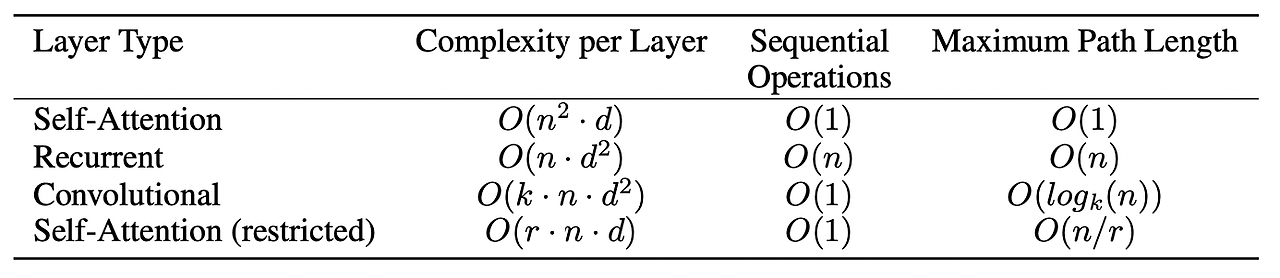

**1) the total computational complexity per layer**

위 표에서 self-attention과 RNN을 비교해보면, sequence length n이 representation dimensionality d보다 작아야지 complexity가 Self-attention이 RNN보다 더 낮아지게 된다. 보통 n이 d보다 작은 경우가 대부분이기 때문에 self-attention이 complexity가 더 작다고 말할 수 있다.



추가로 computational performance를 향상시키기 위해, self-attention을 오직 r 크기의 neighborhood만 고려하게 만듦으로써 더욱 complexity를 떨어트리게 만들 수 있다.



**2) the amount of computation that can be parallelized**

이전에 설명했듯이, RNN은 input을 순차적으로 입력받아 총 n번 RNN cell을 거치게 되고, self-attention layer는 input의 모든 position 값들을 연결하여 한번에 처리할 수 있다. 따라서 Sequential operations이 O(1)을 가지고, 이는 parallel system에서 유리하게 사용된다.



**3) the path length between long-range dependencies in the network**

long-range dependencies란, 말그대로 position상 멀리 떨어져있는 단어들 간의 dependency를 말하고 이를 학습하는 것은 sequence transduction task에서 key challenge에 해당된다. 이러한 long-dependencey를 잘 배우기 위함에 있어서 length of paths가 큰 영향을 미친다고 한다.

- 여기서 length of paths란 forward와 backward signals간의 길이를 말하는데, 쉽게 이해하기 위해서 예를 들어보자. 만약 i love you라는 문장을 한국어인 난 너를 사랑해로 translation하는 모델을 학습하고자 한다. 이때, path lengths는 한국어 token들과 영어 token들 간의 길이를 말하는 것이다. 그리고 maximum path length는 "i"와 "사랑해" 사이의 길이인 6(encoder sequence length + decoder sequence length)이 된다.



- 이와 관련된 여러 실험에 따르면, input과 output sequence 사이에 조합 간 paths가 짧을 수록 long-range dependencies를 더 잘 학습할 수 있다고 한다. 따라서 논문에서는 이러한 maximum path lengths도 비교하여 self-attention이 좋은 이유를 설명한다.



- self-attention은 각 token들을 모든 token들과 참조하여 그 correlation information을 구해서 더해주기 때문에(심지어 encoder-decoder끼리도), maximum path length를 O(1)이라고 볼 수 있다. 따라서 long-range dependencies를 더 쉽게 학습할 수 있다는 장점을 가진다.

> **Model Variation** : 모델의 여러 조건들을 변경해가면서 성능에 어떠한 영향을 주는지를 보는 실험

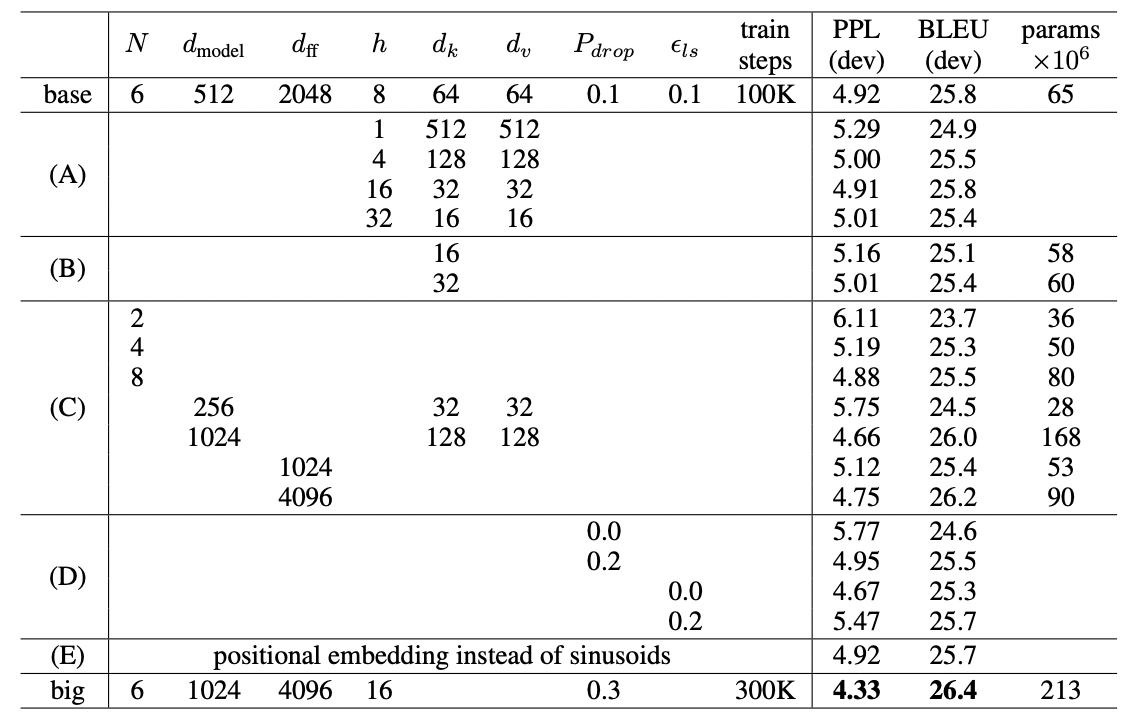

결과를 간단히 살펴보면, (B)key size 를 너무 줄이면 quality가 안좋아지고 (C) 큰 모델이 더 성능이 좋으며, (D) drop-out이 오버피팅을 피하는데 도움이 된다는 것을 볼 수 있다.